# Lung Function in 1 to 10 Year Old Children

output y = FEV (forced exhalation volume)

Sử dụng Linenear Regression để thực hiện việc dự đoán **FEV** dựa trên các thuộc tính **age/ age** và **ht**

In [1]:
data <- read.csv("./Du lieu cung cap/children_lung.csv",header=TRUE)
head(data)

,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


In [2]:
data$sex = as.factor(data$sex)
data$smoke = as.factor(data$smoke)

In [3]:
print(is.data.frame(data))

[1] TRUE


In [4]:
print(paste("cols: ", ncol(data)))
print(paste("rows: ", nrow(data)))

[1] "cols:  5"
[1] "rows:  654"


In [5]:
summary(data)

      age             FEV               ht          sex       smoke    
 Min.   :1.458   Min.   : 0.791   Min.   :46.00   0   :155   0   :308  
 1st Qu.:3.049   1st Qu.: 2.041   1st Qu.:53.50   1   :154   1   :  1  
 Median :4.330   Median :59.000   Median :57.00   NA's:345   NA's:345  
 Mean   :5.205   Mean   :35.210   Mean   :56.92                        
 3rd Qu.:8.000   3rd Qu.:65.000   3rd Qu.:60.00                        
 Max.   :9.000   Max.   :74.000   Max.   :69.00                        
                                  NA's   :345                          

In [6]:
str(data)

'data.frame':	654 obs. of  5 variables:
 $ age  : num  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ ht   : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ sex  : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 1 1 1 ...
 $ smoke: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
library(Amelia)

Warning message:
"package 'Amelia' was built under R version 3.6.3"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



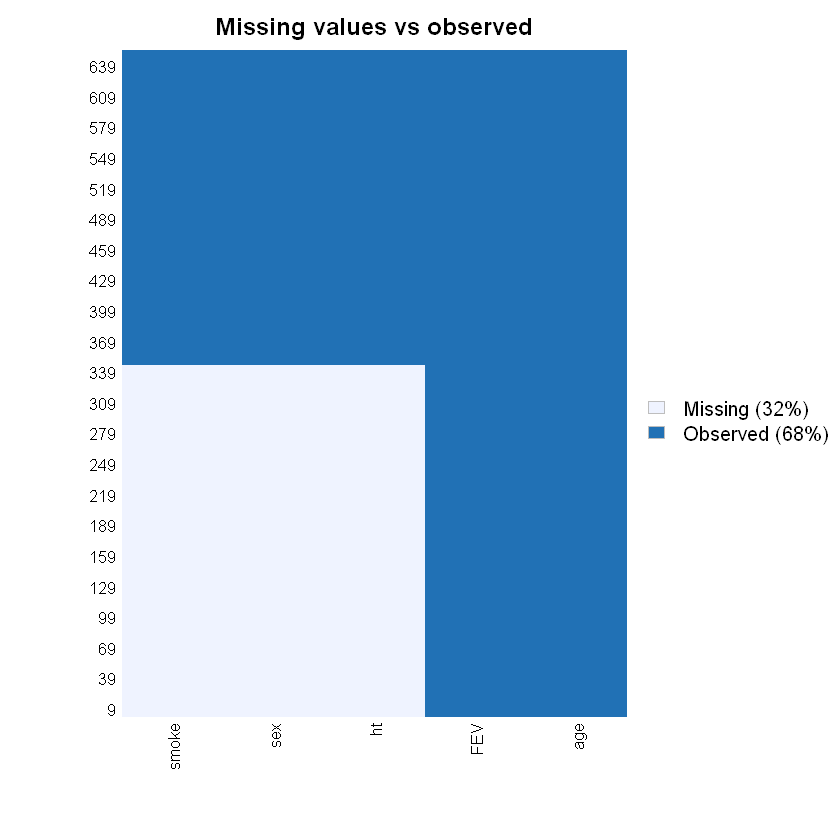

In [8]:
missmap(data, main="Missing values vs observed")

Có 32% dữ liệu bị thiếu ở cột smoke, sex và ht, tương đối nhiều so với tập dữ liệu

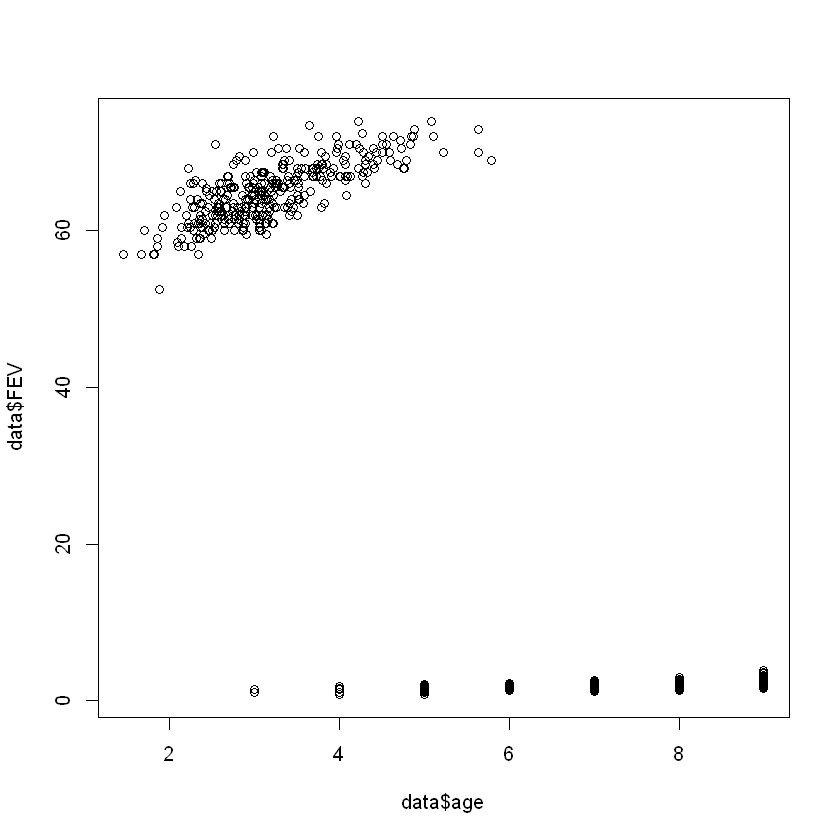

In [9]:
plot(data$age, data$FEV)

Biểu đồ trên cho thấy với FEV < 10, age tăng không làm FEV tăng đáng kể. Với FEV > 10, có sự thay đổi rõ rệt ở FEV khi age tăng.
--> chia dữ liệu thành 2 phần : FEV <10 và FEV >10.

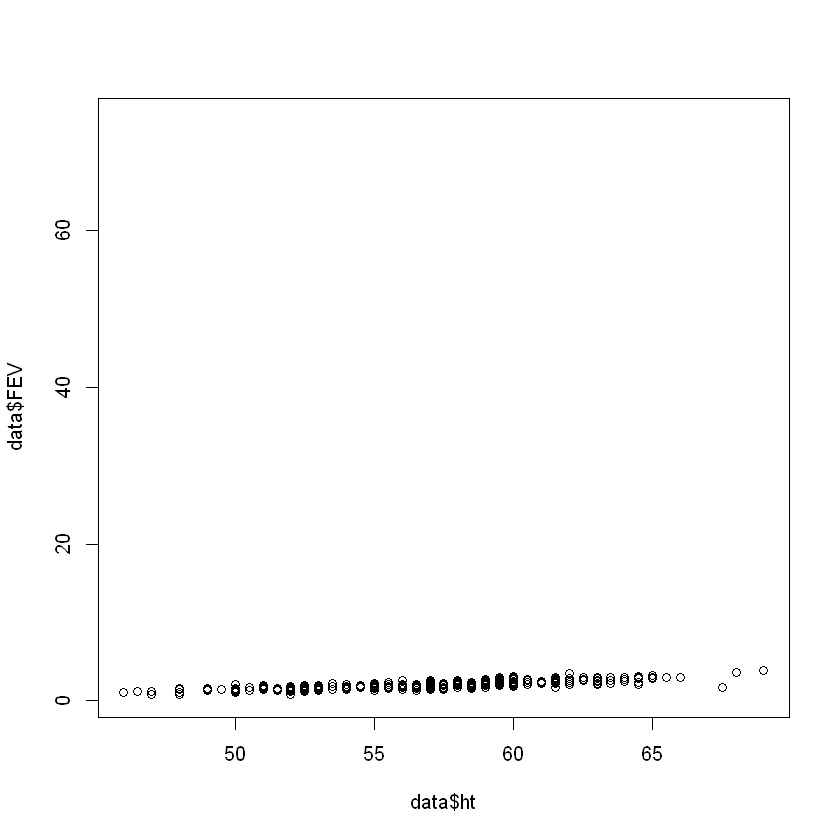

In [10]:
plot(data$ht, data$FEV)

Biểu đồ trên cho thấy với FEV > 10, không có dữ liệu ht. Sẽ điền dữ liệu thiếu ở cột ht sau khi chia dữ liệu FEV.

**Chia dữ liệu**

In [11]:
data_FEV_less_10 <- data[data$FEV <10,]
data_FEV_more_10 <- data[data$FEV >10,]

In [12]:
print(nrow(data_FEV_less_10))

[1] 309


In [13]:
print(nrow(data_FEV_more_10))

[1] 345


### Với data_FEV_more_10 :

a. Thực hiện Simple Linear Regression để dự đoán FEV từ age. Xây dựng model. Đánh giá model.

b. Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?

c. Trực quan hóa kết quả.

In [14]:
library("ggplot2")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [15]:
plot <- ggplot(data = data_FEV_more_10, aes(x=age, y=FEV))+
        geom_point() + geom_smooth(formula = y ~ x,method="lm") +
        theme_bw(base_size = 14)

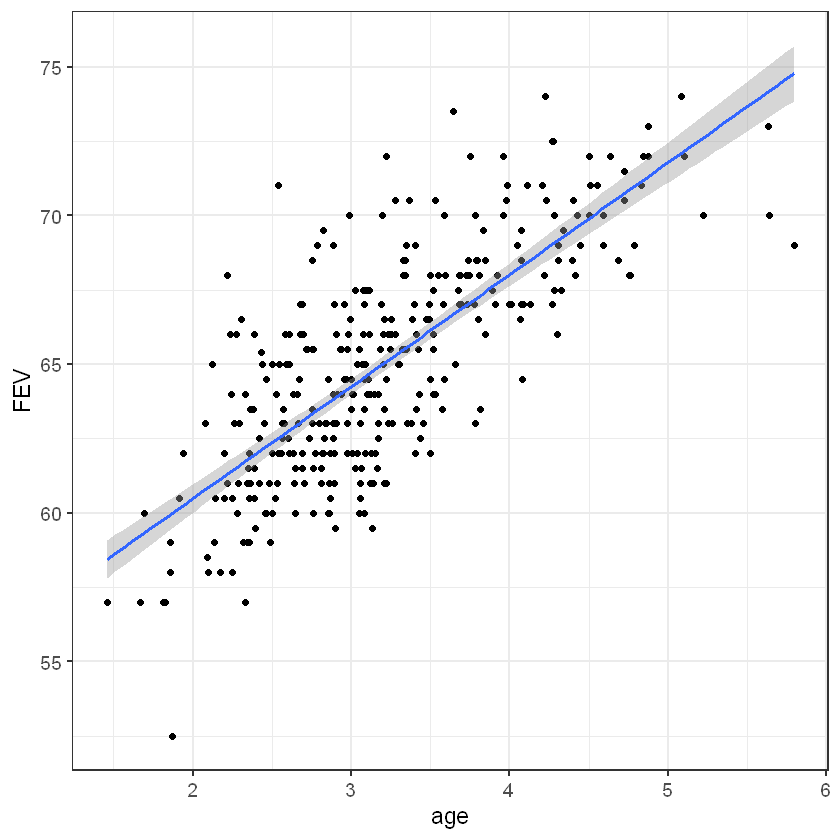

In [16]:
plot

In [17]:
print(cor(data_FEV_more_10$FEV, data_FEV_more_10$age))

[1] 0.7607791


Với FEV >10, FEV và age có tương quan tuyến tính thuận cao.

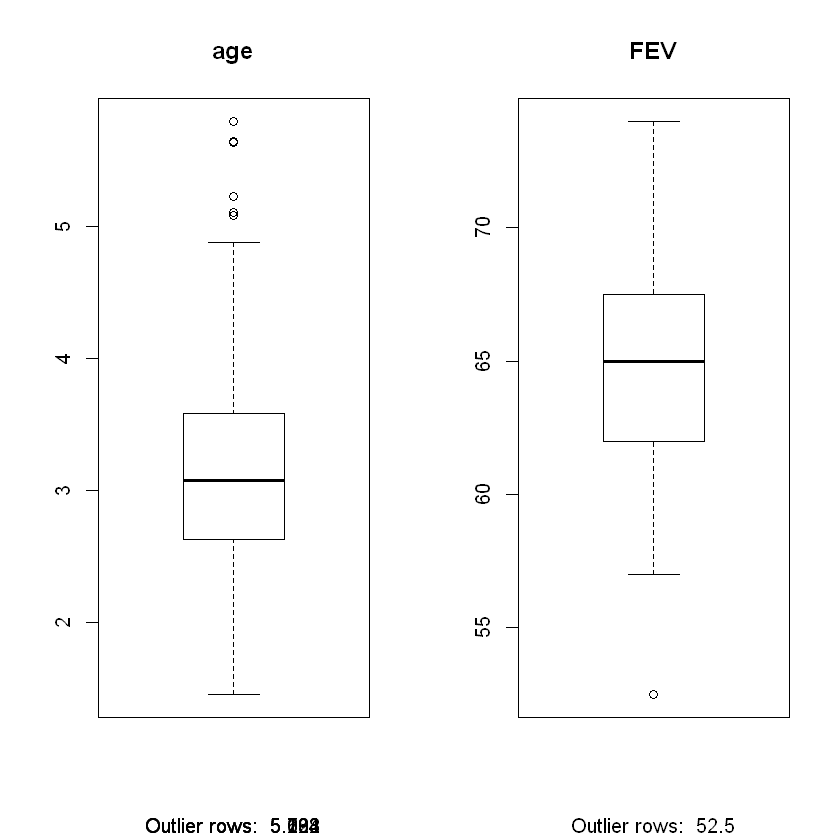

In [18]:
par(mfrow = c(1,2))
boxplot(data_FEV_more_10$age, main="age",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_more_10$age)$out))
boxplot(data_FEV_more_10$FEV, main="FEV",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_more_10$FEV)$out))

Cột age có khoảng 6 outliers trên, cột FEV có 1 outlier dưới.

In [19]:
fev_out <- boxplot.stats(data_FEV_more_10$FEV)$out
age_out <- boxplot.stats(data_FEV_more_10$age)$out

In [20]:
data_FEV_more_10_new <- data_FEV_more_10[!(data_FEV_more_10$FEV %in% fev_out),]
data_FEV_more_10_new <- data_FEV_more_10_new[!(data_FEV_more_10_new$age %in% age_out),]

In [21]:
print(nrow(data_FEV_more_10_new))

[1] 338


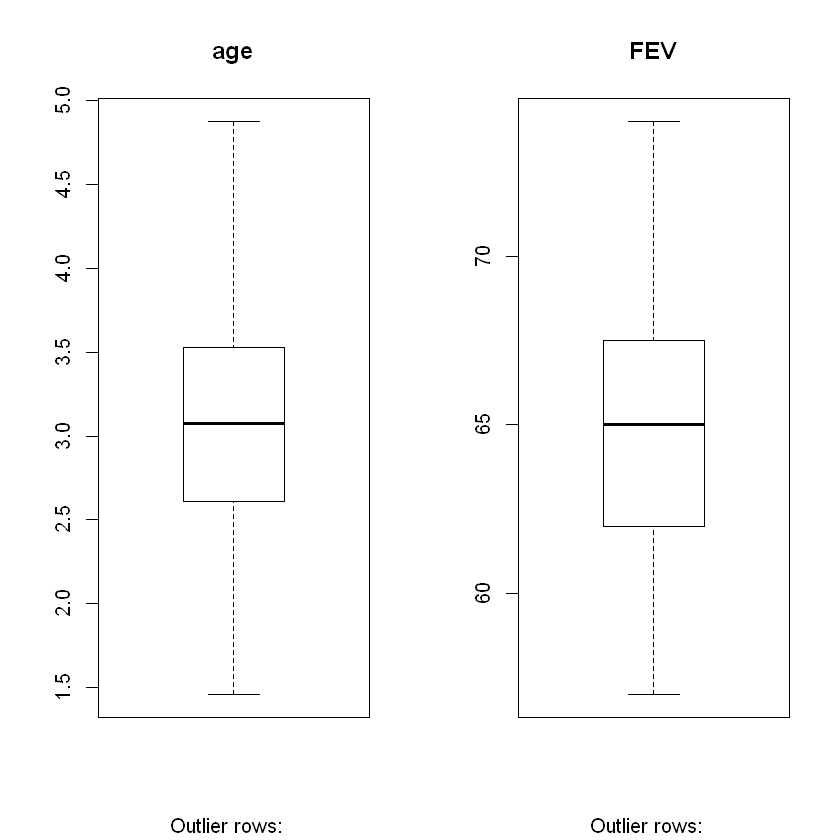

In [22]:
par(mfrow = c(1,2))
boxplot(data_FEV_more_10_new$age, main="age",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_more_10_new$age)$out))
boxplot(data_FEV_more_10_new$FEV, main="FEV",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_more_10_new$FEV)$out))

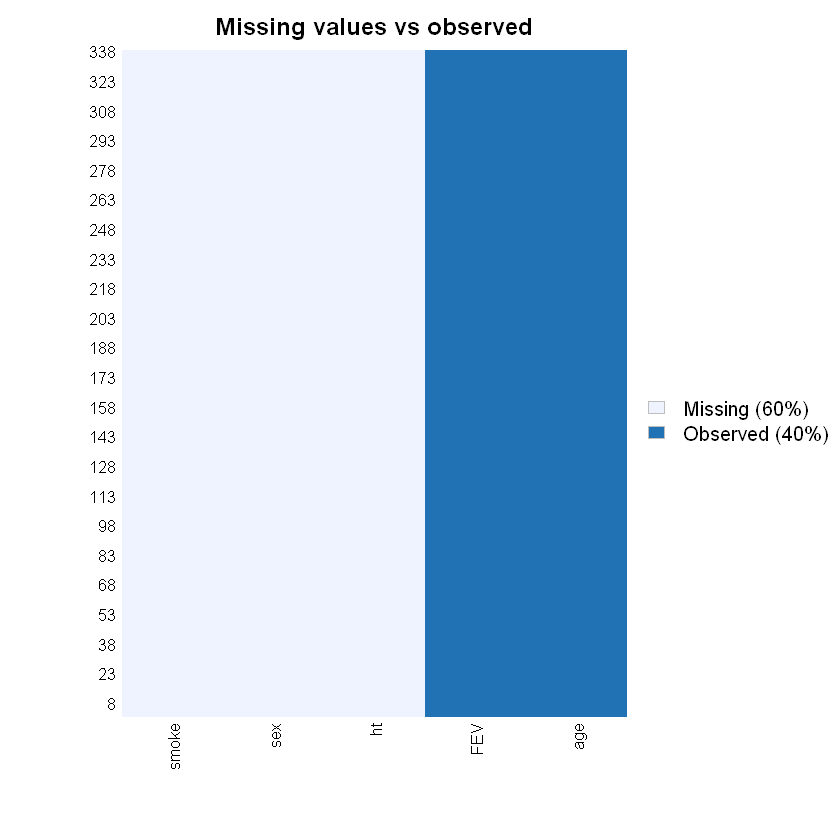

In [23]:
missmap(data_FEV_more_10_new, main="Missing values vs observed")

Remove the missing value row in FEV and Age

In [24]:
data_FEV_more_10_new <- data_FEV_more_10_new[!is.na(data_FEV_more_10_new$FEV),]
data_FEV_more_10_new <- data_FEV_more_10_new[!is.na(data_FEV_more_10_new$age),]

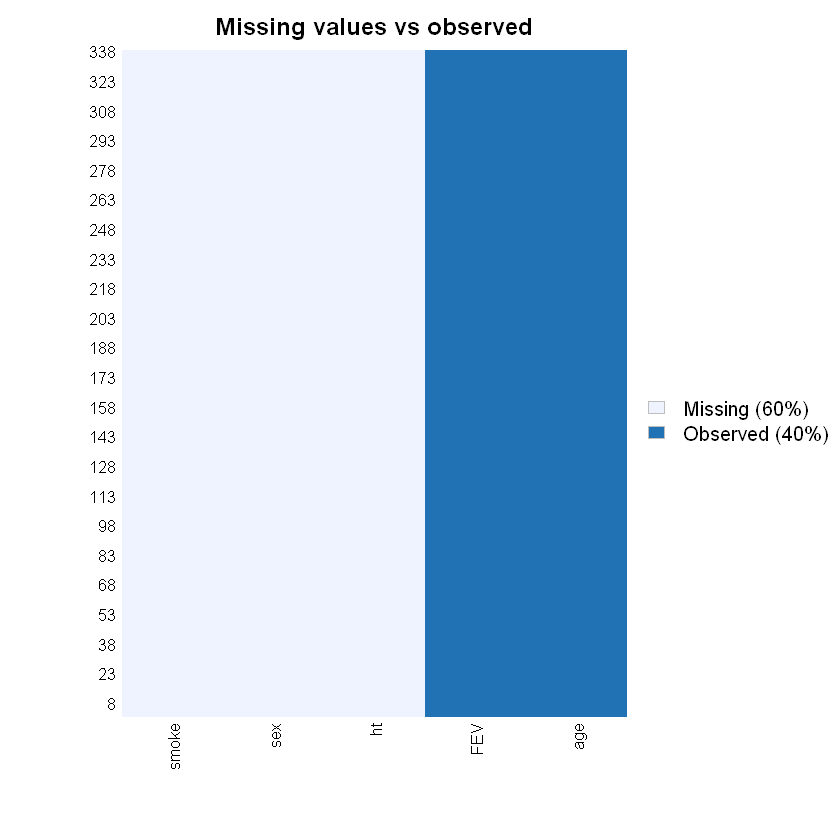

In [25]:
missmap(data_FEV_more_10_new, main="Missing values vs observed")

In [26]:
# create train, test
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_FEV_more_10_new), 0.7*nrow(data_FEV_more_10_new))
print("Selected training row indexes")
print(trainingRowIndex)
trainingData <- data_FEV_more_10_new[trainingRowIndex,]
testData <- data_FEV_more_10_new[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes"
  [1]  49 321 153  74 228 146 122 338 128 303  24 327  89 165 110  20 297 326
 [19] 283 109   5 212 259 314 298 328 158 299 136 292 333 319 197   4 226 215
 [37] 245 114 262 130   3 258 186 138  40 318  33 103 334 307 157  76 265  35
 [55] 221  16 220 248 118 311  82 324 149  57 100  91 269 181  54 208 246  60
 [73] 108 126 112  72   1 141 206  42 316 281  97 251 185 288  25 115 191  32
 [91]  81 238  14 111   6 175  43 190 325 272 113 247  31 162  94 224 244 214
[109]  38  95 232  84  15  34 170 329 188  12 330 154  41 193  66  56 152  98
[127] 252  92 107  61 241 268 235 124 194 229 249 155 295 254  28 280  37 200
[145] 237 293 285  78 207 156 332 256 182 127 236 242 180 257  27  30 274  75
[163] 145  62  13 286 205  63 331 209 116 300 176 161 198   2 159 310 199 315
[181] 174 284  51 203  47 223 144  10 260 278 164  93 275 227 306 169 102 270
[199]  55 261  58 183  85 142 233  18 140  36  71 204 296 234 217  86 323 301
[217] 222 218  11 211 230 10

Train : 236 samples, test: 102 samples

In [27]:
lmMod <- lm(FEV ~ age, data= trainingData)
iPred <- predict(lmMod, testData)

In [28]:
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))

[1] "mse:  6.32773422206621"


In [29]:
mse_test = mean((testData$FEV - iPred)^2)
print(paste("mse in test: ", mse_test))

[1] "mse in test:  4.10520968836235"


Nhan xet: mse của train và test đều thấp so với dữ liệu và gần nhau.

In [30]:
print(summary(lmMod))


Call:
lm(formula = FEV ~ age, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4314 -1.7198 -0.2345  1.5318  8.4069 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.6025     0.7633   68.91   <2e-16 ***
age           3.9364     0.2346   16.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.526 on 234 degrees of freedom
Multiple R-squared:  0.546,	Adjusted R-squared:  0.5441 
F-statistic: 281.4 on 1 and 234 DF,  p-value: < 2.2e-16



Model có chỉ số R^2 = 0.55 ~ 55% --> Model không tương thích với bộ dữ liệu.

**Dự đoán kết quả mới**

In [31]:
print(coef(lmMod))
beta_age <- coef(lmMod)['age']
print(paste("slope: ", beta_age))
Intercept <- coef(lmMod)['(Intercept)']
print(paste("Intercept: ", Intercept))

(Intercept)         age 
  52.602466    3.936427 
[1] "slope:  3.93642695971993"
[1] "Intercept:  52.602466015927"


In [32]:
# new predictions
x <- c(2, 3, 4, 5)
y <- Intercept + beta_age * x
print("solution 1 - results:")
print(y)

[1] "solution 1 - results:"
[1] 60.47532 64.41175 68.34817 72.28460


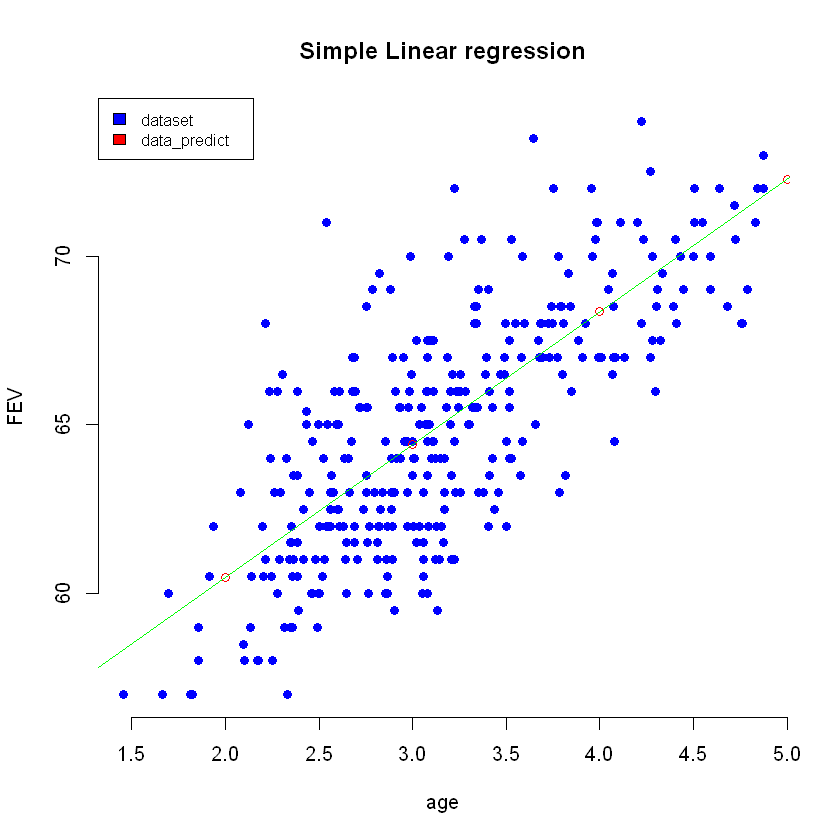

In [33]:
plot(data_FEV_more_10_new$age, data_FEV_more_10_new$FEV,
    main="Simple Linear regression",
    xlab="age", ylab="FEV",
    pch=19, frame=FALSE, col="blue")
lines(x,y, col="red", type="p")
abline(lmMod, data_FEV_more_10_new, col="green")
legend("topleft",
      c("dataset","data_predict"),

       cex=0.8,
      fill=c("blue","red"))

### Với data_FEV_less_10
a. Thực hiện **Multiple Linear Regression** để dự đoán **FEV** từ **age** và **ht**.

b. Cho age và ht lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5,55, 57, 60, 62] . Hãy cho biết FEV lần lượt là 
bao nhiêu?

c. Trực quan hóa kết quả.

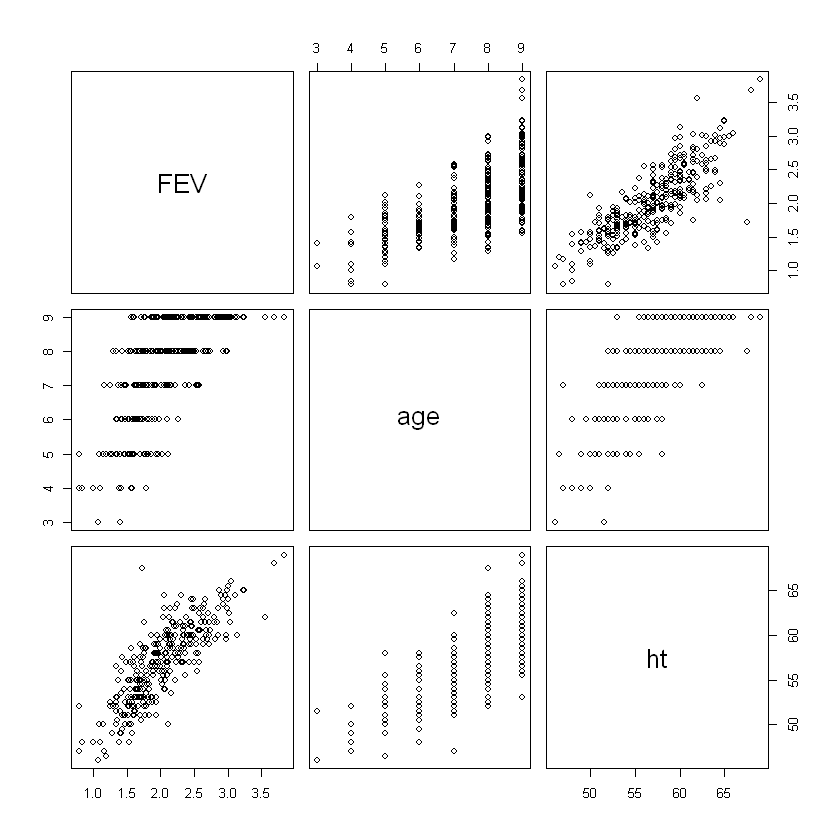

In [34]:
pairs(~FEV+age+ht, data=data_FEV_less_10)

In [35]:
print(cor(data_FEV_less_10$age,data_FEV_less_10$FEV))
print(cor(data_FEV_less_10$ht,data_FEV_less_10$FEV))

[1] 0.6513871
[1] 0.8198856


Biểu đồ và chỉ số correlation cho thấy quan hệ tuyến không cao giữa age và FEV (cor = 0.65), trong khi đó ht và FEV có mối quan hệ tuyến tính cao (cor = 0.82).

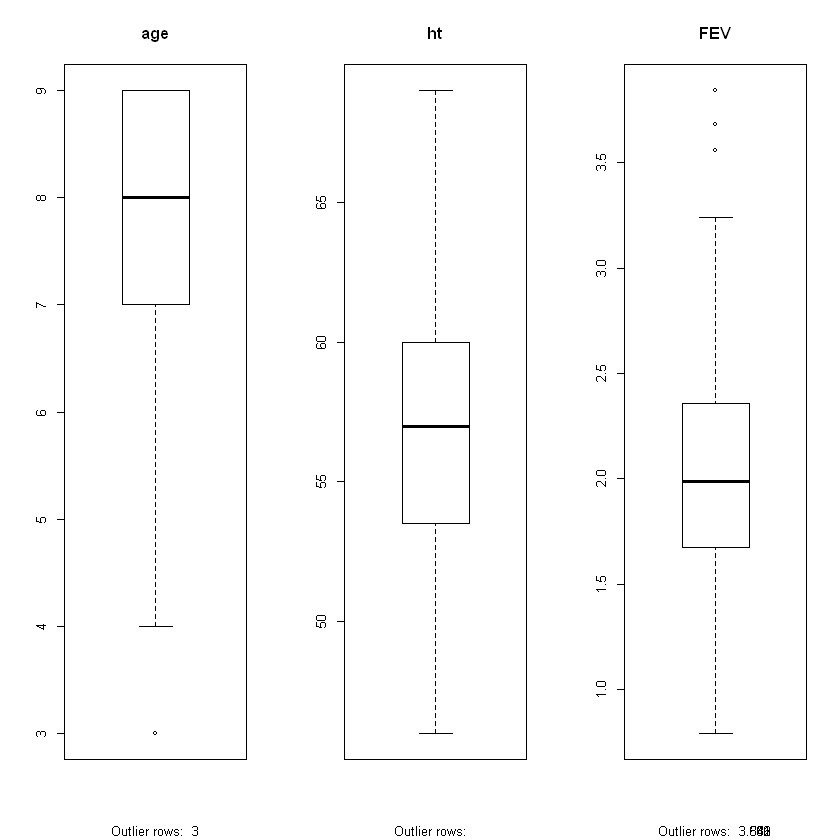

In [36]:
par(mfrow = c(1,3))
boxplot(data_FEV_less_10$age, main="age",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_less_10$age)$out))
boxplot(data_FEV_less_10$ht, main="ht",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_less_10$ht)$out))
boxplot(data_FEV_less_10$FEV, main="FEV",
       sub=paste("Outlier rows: ", boxplot.stats(data_FEV_less_10$FEV)$out))

Cột age và FEV có vài outliers

In [37]:
# xu ly cac dong chua outliers
fev_outliers <- boxplot.stats(data_FEV_less_10$FEV)$out
print("fev_outliers: ")
print(fev_outliers)
print(paste("Numrows: ", sum(data_FEV_less_10$FEV %in% fev_outliers)))

age_outliers <- boxplot.stats(data_FEV_less_10$age)$out
print("age_outliers: ")
print(age_outliers)
print(paste("Numrows: ", sum(data_FEV_less_10$age %in% age_outliers)))

# drop rows have outliers
print(paste("Before drop:", nrow(data_FEV_less_10)))

data_FEV_less_10_new <- data_FEV_less_10[!(data_FEV_less_10$FEV %in% fev_outliers),]
data_FEV_less_10_new <- data_FEV_less_10_new[!(data_FEV_less_10_new$age %in% age_outliers),]

print(paste("After drop:", nrow(data_FEV_less_10_new)))

[1] "fev_outliers: "
[1] 3.556 3.842 3.681
[1] "Numrows:  3"
[1] "age_outliers: "
[1] 3 3
[1] "Numrows:  2"
[1] "Before drop: 309"
[1] "After drop: 304"


In [38]:
# create train, test
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_FEV_less_10_new), 0.7*nrow(data_FEV_less_10_new))
print("Selected training row indexes")
print(trainingRowIndex)
trainingData_l <- data_FEV_less_10_new[trainingRowIndex,]
testData_l <- data_FEV_less_10_new[-trainingRowIndex,]
print("Rows of training data and test data:")
print(nrow(trainingData_l))
print(nrow(testData_l))

[1] "Selected training row indexes"
  [1]  49 153  74 228 146 122 304 128  24  89 165 110  20 295 283 109   5 212
 [19] 259 296 158 136 300 289 197   4 226 215 245 114 262 130   3 258 186 138
 [37]  40 288  33 103 301 281 157  76  35 221  16 220 248 238  69 257 118 273
 [55]  82 152 113 282 254 293 104 183 268 149 264  57 100 231  42 247  91  13
 [73] 181  54  83  32 208  60  29  81 108 201 121  85 126 171 270 112  72 278
 [91] 243 166   1 141 206 133 223  55 144  43 236 204  97 185 274  25 115 191
[109] 229 225  14 111   6 175 205 294 256 188  31 162  94 192  38  95 214  84
[127]  15  34 170  12 297 154  41  66  56 249  98 199  92 107  61 194 240 124
[145] 232 196 155 269  28 252  37 200 187 267 260  78 163 299 202 127 218 190
[163] 195  27  30 255  75  62 233 253 161  63 298 164 116 287  17 266 156   2
[181] 210   8  80 272 101 290 280  65 140  51 227 160 173  47 176  70 271  10
[199]  71  73 167 222 250  53 135  79  93 239 179 291 147  88
[1] "Rows of training data and test data:"
[

Train có 212 mẫu, test có 92 mẫu

In [39]:
mlmMod <- lm(FEV~age+ht, data= trainingData_l)
cPred <- predict(mlmMod, testData_l)

In [40]:
mse_l <- mean(mlmMod$residuals^2)
print(paste("mse: ", mse_l))

[1] "mse:  0.0793638773894001"


In [41]:
mse_test_l = mean((testData_l$FEV - cPred)^2)
print(paste("mse in test: ", mse_test_l))

[1] "mse in test:  0.0828937724965587"


Nhan xet: mse của train và test đều thấp và gần nhau.

In [42]:
print(summary(mlmMod))


Call:
lm(formula = FEV ~ age + ht, data = trainingData_l)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25828 -0.19223  0.00972  0.18757  0.80073 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.068397   0.297097 -10.328   <2e-16 ***
age          0.012859   0.021824   0.589    0.556    
ht           0.088116   0.007101  12.409   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2837 on 209 degrees of freedom
Multiple R-squared:  0.6657,	Adjusted R-squared:  0.6625 
F-statistic: 208.1 on 2 and 209 DF,  p-value: < 2.2e-16



Model Multiple linear regression có R^2 là 66%, không cao --> model này chưa hoàn toàn thích hợp với bài toán này.

**Dự đoán kết quả mới**

In [43]:
cat("# # # # The coefficient values # # #","\n")
b <- coef(mlmMod)[1]
print(b)

mage <- coef(mlmMod)['age']
mht <- coef(mlmMod)['ht']


print(mage)
print(mht)

# # # # The coefficient values # # # 
(Intercept) 
  -3.068397 
       age 
0.01285944 
        ht 
0.08811551 


In [44]:
x1 <- c(5, 6, 7, 8, 9)
x2 <- c(49.5,55, 57, 60, 62)
y1 <- predict(mlmMod, data.frame(age=x1, ht=x2))
print("solution 2 - results:")
print(y1)

[1] "solution 2 - results:"
       1        2        3        4        5 
1.357618 1.855112 2.044203 2.321409 2.510499 


Warning message in abline(mlmMod, data_FEV_less_10_new, col = "green"):
"only using the first two of 3 regression coefficients"


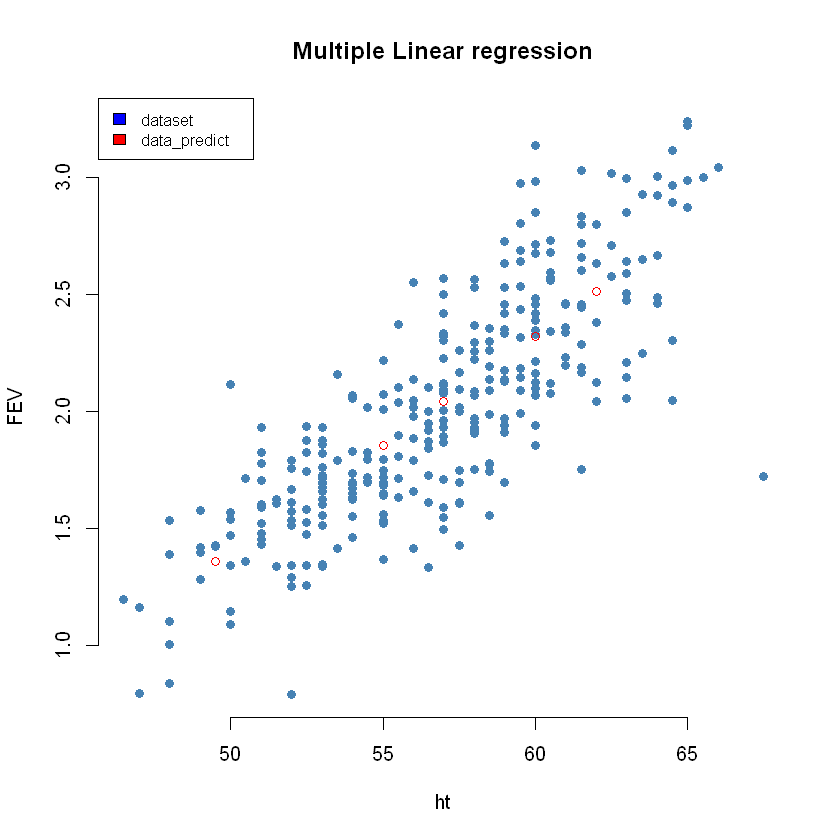

In [45]:
plot(data_FEV_less_10_new$ht, data_FEV_less_10_new$FEV,
    main="Multiple Linear regression",
    xlab="ht", ylab="FEV",
    pch=19, frame=FALSE, col="steelblue")
lines(x2,y1, col="red", type="p")
abline(mlmMod, data_FEV_less_10_new, col="green")
legend("topleft",
      c("dataset","data_predict"),
      cex=0.8,
      fill=c("blue","red"))

In [46]:
install.packages("scatterplot3d")
library("scatterplot3d") 

Installing package into 'C:/Users/ASUS/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\Rtmp84LqXk\downloaded_packages


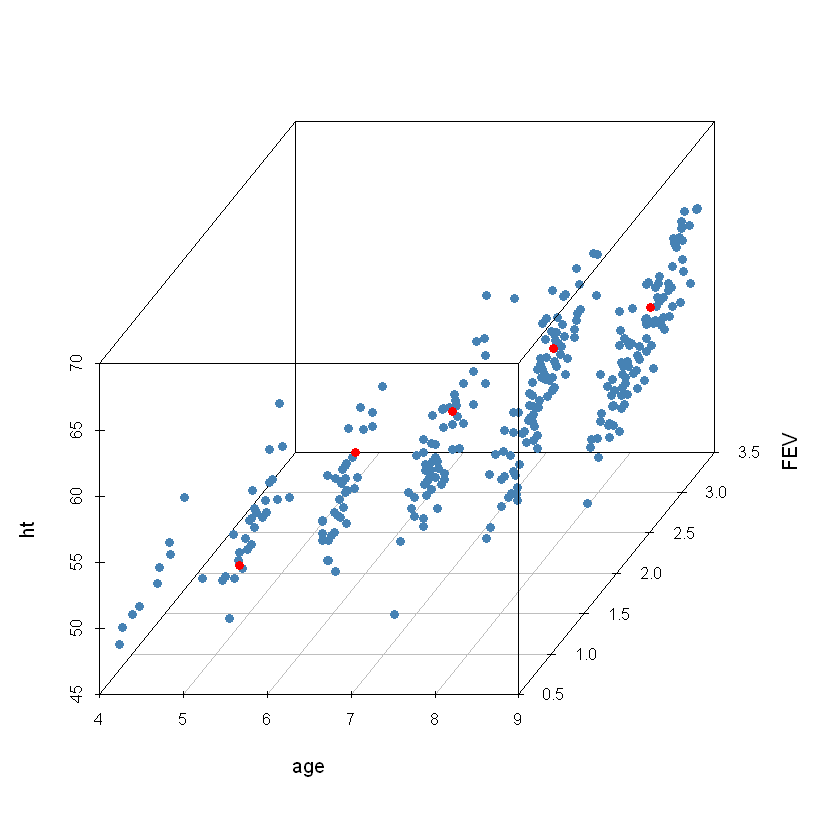

In [47]:
s3d <- scatterplot3d(data_FEV_less_10_new[,1:3], pch = 16, color="steelblue", angle=55)
s3d$plane3d(mlmMod,lty = "dashed")
s3d$points3d(x1, y1, x2,
    col = "red", type = "p", pch = 16)